<a href="https://colab.research.google.com/github/TheAmirHK/SmartProduction/blob/main/Intelligent_Predictive_Maintenance_from_Sensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
try:
    df = pd.read_csv('sensor_data.csv')

    print(df.head())
except FileNotFoundError:
    print("Error: sensor_data.csv not found in the current directory.")

      Pressure   Humidity  Tempeture  failure
0  1000.993428  20.682532  49.669747        0
1   999.723471  24.843983  44.963497        0
2  1001.295377  25.090084  48.276250        0
3  1003.046060  27.363152  57.147317        0
4   999.531693  18.165708  62.778567        0


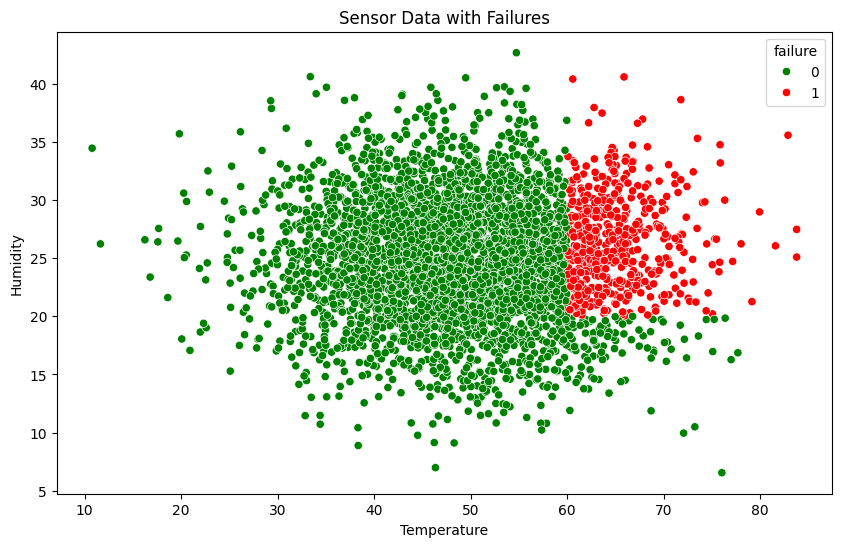

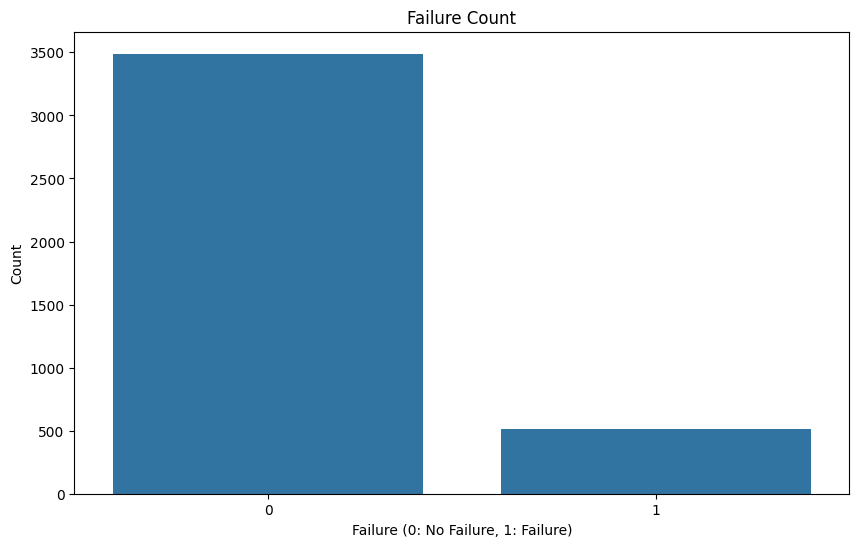

In [ ]:
# Visualize the failure portion
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tempeture', y='Humidity', hue='failure', data=df, palette=['green', 'red'])
plt.title('Sensor Data with Failures')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='failure', data=df)
plt.title('Failure Count')
plt.xlabel('Failure (0: No Failure, 1: Failure)')
plt.ylabel('Count')
plt.show()

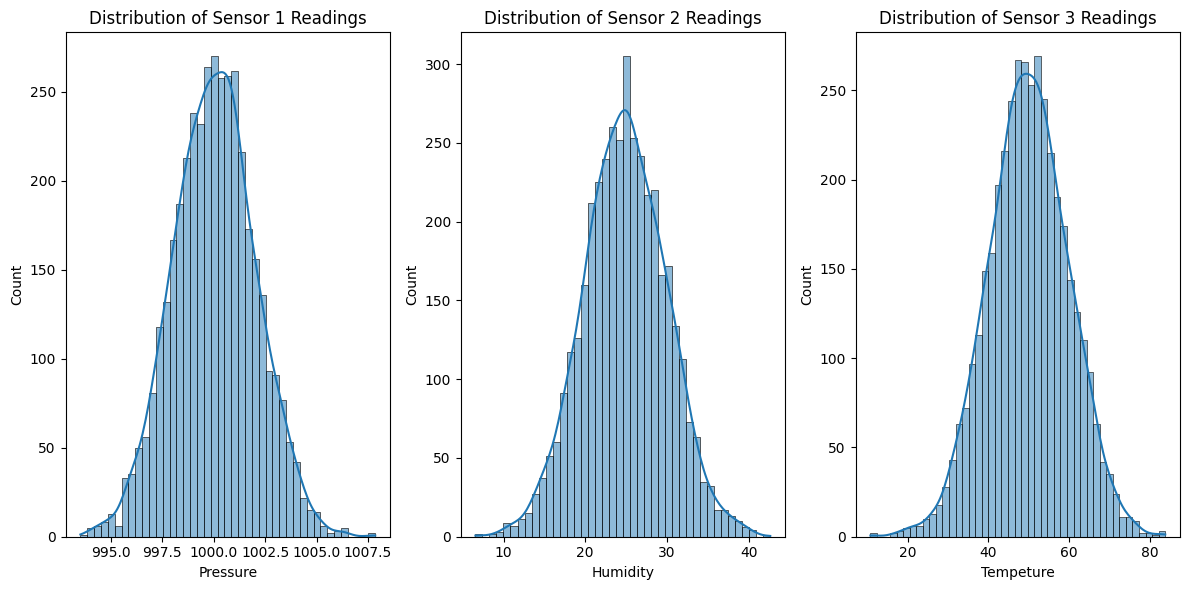

In [ ]:
# Visualize the distribution of sensor readings
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Pressure'], kde=True)
plt.title('Distribution of Sensor 1 Readings')

plt.subplot(1, 3, 2)
sns.histplot(df['Humidity'], kde=True)
plt.title('Distribution of Sensor 2 Readings')

plt.subplot(1, 3, 3)
sns.histplot(df['Tempeture'], kde=True)
plt.title('Distribution of Sensor 3 Readings')

plt.tight_layout()
plt.show()

In [ ]:
# Handle missing values
data = df.fillna(method="ffill")

# Feature and target separation
X = data.drop(["failure"], axis=1)  # Features
y = data["failure"]  # Target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<ipython-input-5-468733dd712e>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method="ffill")


In [ ]:
# Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

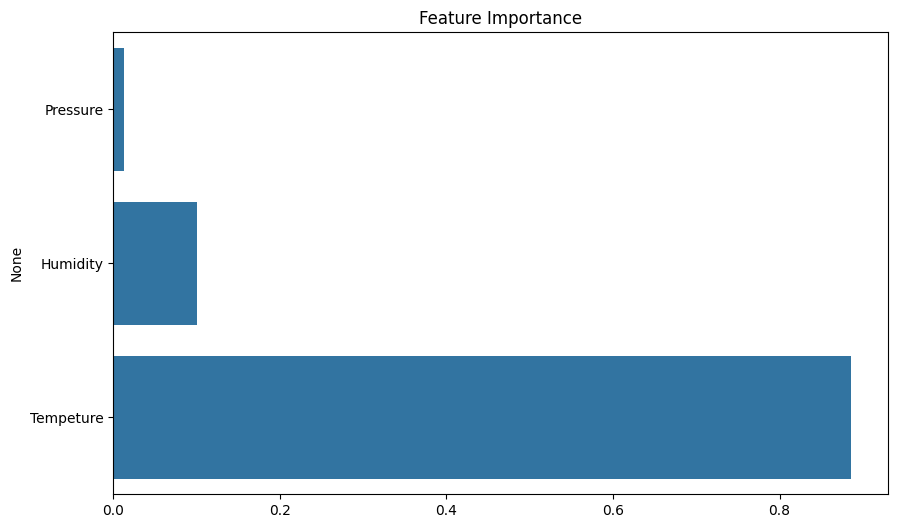

In [ ]:
# Visualize feature importance
importances = model.feature_importances_
feature_names = data.drop(["failure"], axis=1).columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
rul_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
rul_model.fit(X_train, y_train)  # y_train_rul: RUL data

# Predict on test data
y_pred_rul = rul_model.predict(X_test)

print(f"R^2 Score: {r2_score(y_test, y_pred_rul)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rul)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred_rul)}")

R^2 Score: 0.9999999992918462
Mean Squared Error (MSE): 8.779336308956072e-11
Mean Absolute Error (MAE): 6.179260438078263e-06
